# Classifying Tweets

### In this project, I will use Naive-Bayes Classifier to find patterns in real tweets.  We have 3 datasets here, These three files contain tweets that we gathered from those locations.

### Importing required Libraries

In [32]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

### Loading and Exploring data

In [3]:
new_york_tweets = pd.read_json('new_york.json', lines = True)
london_tweets = pd.read_json('london.json', lines = True)
paris_tweets = pd.read_json('paris.json', lines = True)

### 1-  Exploring new_york_tweets

In [4]:
new_york_tweets.head()                     # Gives info of 1st 5 rows

,created_at,id,id_str,text,display_text_range,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,...,lang,timestamp_ms,extended_tweet,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status,quoted_status_permalink,extended_entities,withheld_in_countries
0,2018-07-26 13:32:33+00:00,1022474755625164800,1022474755625164800,@DelgadoforNY19 Calendar marked.,"[16, 32]","<a href=""http://twitter.com/download/android"" ...",False,1.022208e+18,1.022208e+18,8.290618e+17,...,en,2018-07-26 13:32:33.060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-07-26 13:32:34+00:00,1022474762491183104,1022474762491183104,petition to ban more than one spritz of cologne,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,NaN,NaN,...,en,2018-07-26 13:32:34.697,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-07-26 13:32:35+00:00,1022474765750226945,1022474765750226944,People really be making up beef with you in th...,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,NaN,NaN,...,en,2018-07-26 13:32:35.474,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-07-26 13:32:36+00:00,1022474768736546816,1022474768736546816,30 years old.. wow what a journey... I moved t...,NaN,"<a href=""http://instagram.com"" rel=""nofollow"">...",True,NaN,NaN,NaN,...,en,2018-07-26 13:32:36.186,{'full_text': '30 years old.. wow what a journ...,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-07-26 13:32:36+00:00,1022474769260838913,1022474769260838912,At first glance it looked like asparagus with ...,NaN,"<a href=""http://twitter.com/download/iphone"" r...",True,NaN,NaN,NaN,...,en,2018-07-26 13:32:36.311,{'full_text': 'At first glance it looked like ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
new_york_tweets.info()                #  Displays a summary of the table

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4723 entries, 0 to 4722
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   created_at                 4723 non-null   datetime64[ns, UTC]
 1   id                         4723 non-null   int64              
 2   id_str                     4723 non-null   int64              
 3   text                       4723 non-null   object             
 4   display_text_range         2811 non-null   object             
 5   source                     4723 non-null   object             
 6   truncated                  4723 non-null   bool               
 7   in_reply_to_status_id      1668 non-null   float64            
 8   in_reply_to_status_id_str  1668 non-null   float64            
 9   in_reply_to_user_id        1829 non-null   float64            
 10  in_reply_to_user_id_str    1829 non-null   float64            
 11  in_r

In [6]:
len(new_york_tweets)                   # This shows the number of tweets in our data

4723

In [7]:
print(new_york_tweets.loc[12]["text"])
print(new_york_tweets.loc[10]['user']['name'])

Be best #ThursdayThoughts
Sjava indlalifa


### 2-  Exploring london_tweets

In [8]:
london_tweets.head()

,created_at,id,id_str,text,display_text_range,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,...,retweeted,filter_level,lang,timestamp_ms,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status,quoted_status_permalink,extended_entities
0,2018-07-26 13:39:30+00:00,1022476504855400449,1022476504855400448,@bbclaurak i agree Laura but the Party you see...,"[11, 140]","<a href=""http://twitter.com/download/iphone"" r...",True,1.022447e+18,1.022447e+18,6.118357e+07,...,False,low,en,2018-07-26 13:39:30.109,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-07-26 13:39:30+00:00,1022476506075942912,1022476506075942912,@masturbacaolove Why?,"[17, 21]","<a href=""http://twitter.com/download/iphone"" r...",False,1.021997e+18,1.021997e+18,9.003777e+17,...,False,low,und,2018-07-26 13:39:30.400,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-07-26 13:39:31+00:00,1022476510089949190,1022476510089949184,@JackRobinson80 @pgroresearch Yeah not great b...,"[30, 65]","<a href=""http://twitter.com/download/iphone"" r...",False,1.022444e+18,1.022444e+18,7.355633e+08,...,False,low,en,2018-07-26 13:39:31.357,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-07-26 13:39:33+00:00,1022476519845883905,1022476519845883904,Penalty shit out Arsenal,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,NaN,NaN,...,False,low,en,2018-07-26 13:39:33.683,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-07-26 13:39:36+00:00,1022476532684648448,1022476532684648448,Obviously need some pen practice 🙈,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,NaN,NaN,...,False,low,en,2018-07-26 13:39:36.744,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
london_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5341 entries, 0 to 5340
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   created_at                 5341 non-null   datetime64[ns, UTC]
 1   id                         5341 non-null   int64              
 2   id_str                     5341 non-null   int64              
 3   text                       5341 non-null   object             
 4   display_text_range         3535 non-null   object             
 5   source                     5341 non-null   object             
 6   truncated                  5341 non-null   bool               
 7   in_reply_to_status_id      2230 non-null   float64            
 8   in_reply_to_status_id_str  2230 non-null   float64            
 9   in_reply_to_user_id        2444 non-null   float64            
 10  in_reply_to_user_id_str    2444 non-null   float64            
 11  in_r

In [10]:
print(len(london_tweets))

5341


### 3 -  Exploring paris_tweets

In [11]:
paris_tweets.head()

,created_at,id,id_str,text,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,...,lang,timestamp_ms,display_text_range,extended_entities,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status,quoted_status_permalink,extended_tweet
0,2018-07-27 17:40:45+00:00,1022899608396156928,1022899608396156928,Bulletin météo parisien : des grêlons énormes ...,"<a href=""http://twitter.com/download/android"" ...",False,NaN,NaN,NaN,NaN,...,fr,2018-07-27 17:40:45.854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-07-27 17:40:47+00:00,1022899613550956544,1022899613550956544,Prêt pour le match #USORCL https://t.co/V5jw0S...,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,NaN,NaN,NaN,...,fr,2018-07-27 17:40:47.083,"[0, 26]","{'media': [{'id': 1022899599336525825, 'id_str...",0.0,NaN,NaN,NaN,NaN,NaN
2,2018-07-27 17:40:50+00:00,1022899626041651200,1022899626041651200,MAIS QOIDBDNND'SLS'SLSLLSLS''D DBDODNDNODJDBKD...,"<a href=""http://twitter.com/download/android"" ...",False,NaN,NaN,NaN,NaN,...,in,2018-07-27 17:40:50.061,"[0, 111]","{'media': [{'id': 1022899571884744706, 'id_str...",0.0,NaN,NaN,NaN,NaN,NaN
3,2018-07-27 17:40:57+00:00,1022899655347249152,1022899655347249152,@ToursFC Où peut on le championnat de National...,"<a href=""http://twitter.com/download/android"" ...",False,1.022888e+18,1.022888e+18,978599220.0,978599220.0,...,fr,2018-07-27 17:40:57.048,"[9, 50]",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-07-27 17:40:57+00:00,1022899656685223936,1022899656685223936,Les tismey ils sont bas qu’a tromper leur go e...,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,NaN,NaN,NaN,...,fr,2018-07-27 17:40:57.367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
len(paris_tweets)

2510

So, New York, London and Paris has 4723, 5341, 2510 tweets respectively.

## Classifying using language: Naive Bayes Classifier

Let's begin by looking at the way language is used differently in these three locations. Let's grab the text of all of the tweets and make it one big list. 

In [20]:
new_york_text = new_york_tweets["text"].tolist()
london_text = london_tweets["text"].tolist()                # Taking out the 'text' feature from each DF
paris_text = paris_tweets["text"].tolist()

all_tweets = new_york_text + london_text + paris_text             # Combined text data

I am now going to make *labels* associated with these tweets, <br />
0 -  represents a New York tweet <br />
1 -  represents a London tweet <br />
2 -  represents a Paris tweet

In [21]:
labels = [0] * len(new_york_text) + [1] * len(london_text) + [2] * len(paris_text)

### Let's plot these on graph for better understandings

<BarContainer object of 3 artists>

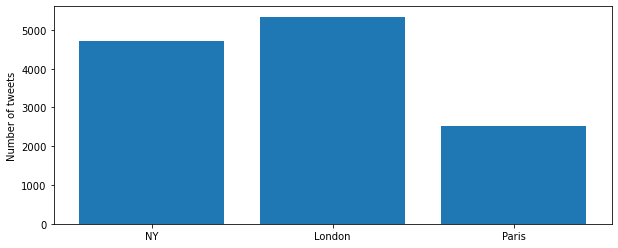

In [15]:
sizes = [
    len(new_york_tweets),
    len(london_tweets),
    len(paris_tweets),
]
plt.figure(figsize = (10,4))
plt.ylabel("Number of tweets")
labels = ["NY", "London", "Paris"]
plt.bar(range(len(sizes)), sizes, tick_label=labels)

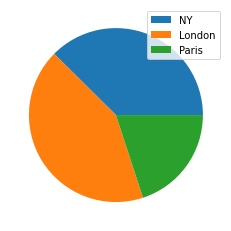

In [16]:
sizes = [len(new_york_tweets), len(london_tweets), len(paris_tweets),]
labelz = ['NY', 'London', 'Paris']
plt.pie(sizes)
plt.legend(labelz)
plt.show()

## Making a Training and Test Set

I am gonna break the data into training set and test set

In [22]:
train_data, test_data, train_labels, test_labels = train_test_split(all_tweets, labels, test_size = 0.2, random_state = 1)

Printing to check if it has loaded properly 

In [23]:
print(len(train_data))
print(len(test_data))

10059
2515


## Making the count vector

To use a Naive Bayes Classifier, we need to transform our lists of words into count vectors. <br />
This changes the sentence `"I love New York, New York"` into a list that contains:<br />

Two `1s` because the words `"I"` and `"love"` each appear once.<br />
Two `2s` because the words `"New"` and `"York"` each appear twice.<br />
Many `0s` because every other word in the training set didn't appear at all.

In [24]:
counter = CountVectorizer()                    # create a CountVectorizer named counter
counter.fit(train_data)                        # This teaches the counter our vocabulary.
train_counts = counter.transform(train_data)
test_counts = counter.transform(test_data)

Let's see what our tweet looks like as a count vector

In [27]:
print(train_data[5])
print(train_counts[5])

@TonyC_BaH @simonjpaine @PaulaW_BaH @wwardrobebl1 I am in Tony. I need the help!
  (0, 2340)	1
  (0, 12560)	1
  (0, 13530)	1
  (0, 18711)	1
  (0, 20395)	1
  (0, 24712)	1
  (0, 26698)	1
  (0, 27257)	1
  (0, 27261)	1
  (0, 29799)	1


## Train and Test the Naive Bayes Classifier

We now have the inputs to our classifier. Let's use the CountVectors to train and test the Naive Bayes Classifier!

In [29]:
classifier = MultinomialNB()
classifier.fit(train_counts, train_labels)
predictions = classifier.predict(test_counts)

## Evaluating our Model

Now that the classifier has made its predictions, let's see how well it did.  <br />
  <br />
The way to do this is by calling the `accuracy_score` function. 

In [33]:
print(accuracy_score(test_labels, predictions))

0.6779324055666004


### The model accuracy score of `67%` is acceptable.

## Testing with my own tweet

In [43]:
tweet = input(f'\nEnter your tweet:\n')
tweet_counts = counter.transform([tweet])
location = classifier.predict(tweet_counts)

if location == 0:
    print('You are probably from : New York ')
elif location == 1:
     print('You are probably from : London ' )
else:
     print('You are probably from : Paris ')


Enter your tweet:
mate howdy
You are probably from : London 


I made this a bit more interactive, It is indeed giving us right results! 